Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so we'll start analyzing the unemployment rate.

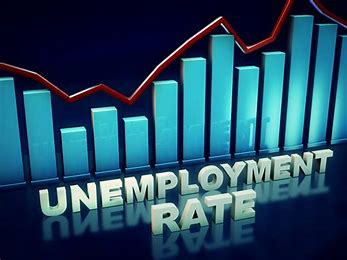

**Loading the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import HTML

In [2]:
df=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Region should be changed to State, Date column dtype is object change it to datetime format,Frequency to categorical variable

In [5]:
#renaming columns 
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'Longitude', 'Latitude']
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   State                                267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    category      
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   Longitude                            267 non-null    float64       
 8   Latitude                             267 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 17.2+ K

Separting month and month name from date

In [7]:
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df=df.drop(['Month'],axis=1)
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [8]:
df.tail()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855,10,Oct


In [9]:
df.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Longitude,Latitude,Month_int
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915


**We'll start visualizing to get better idea**

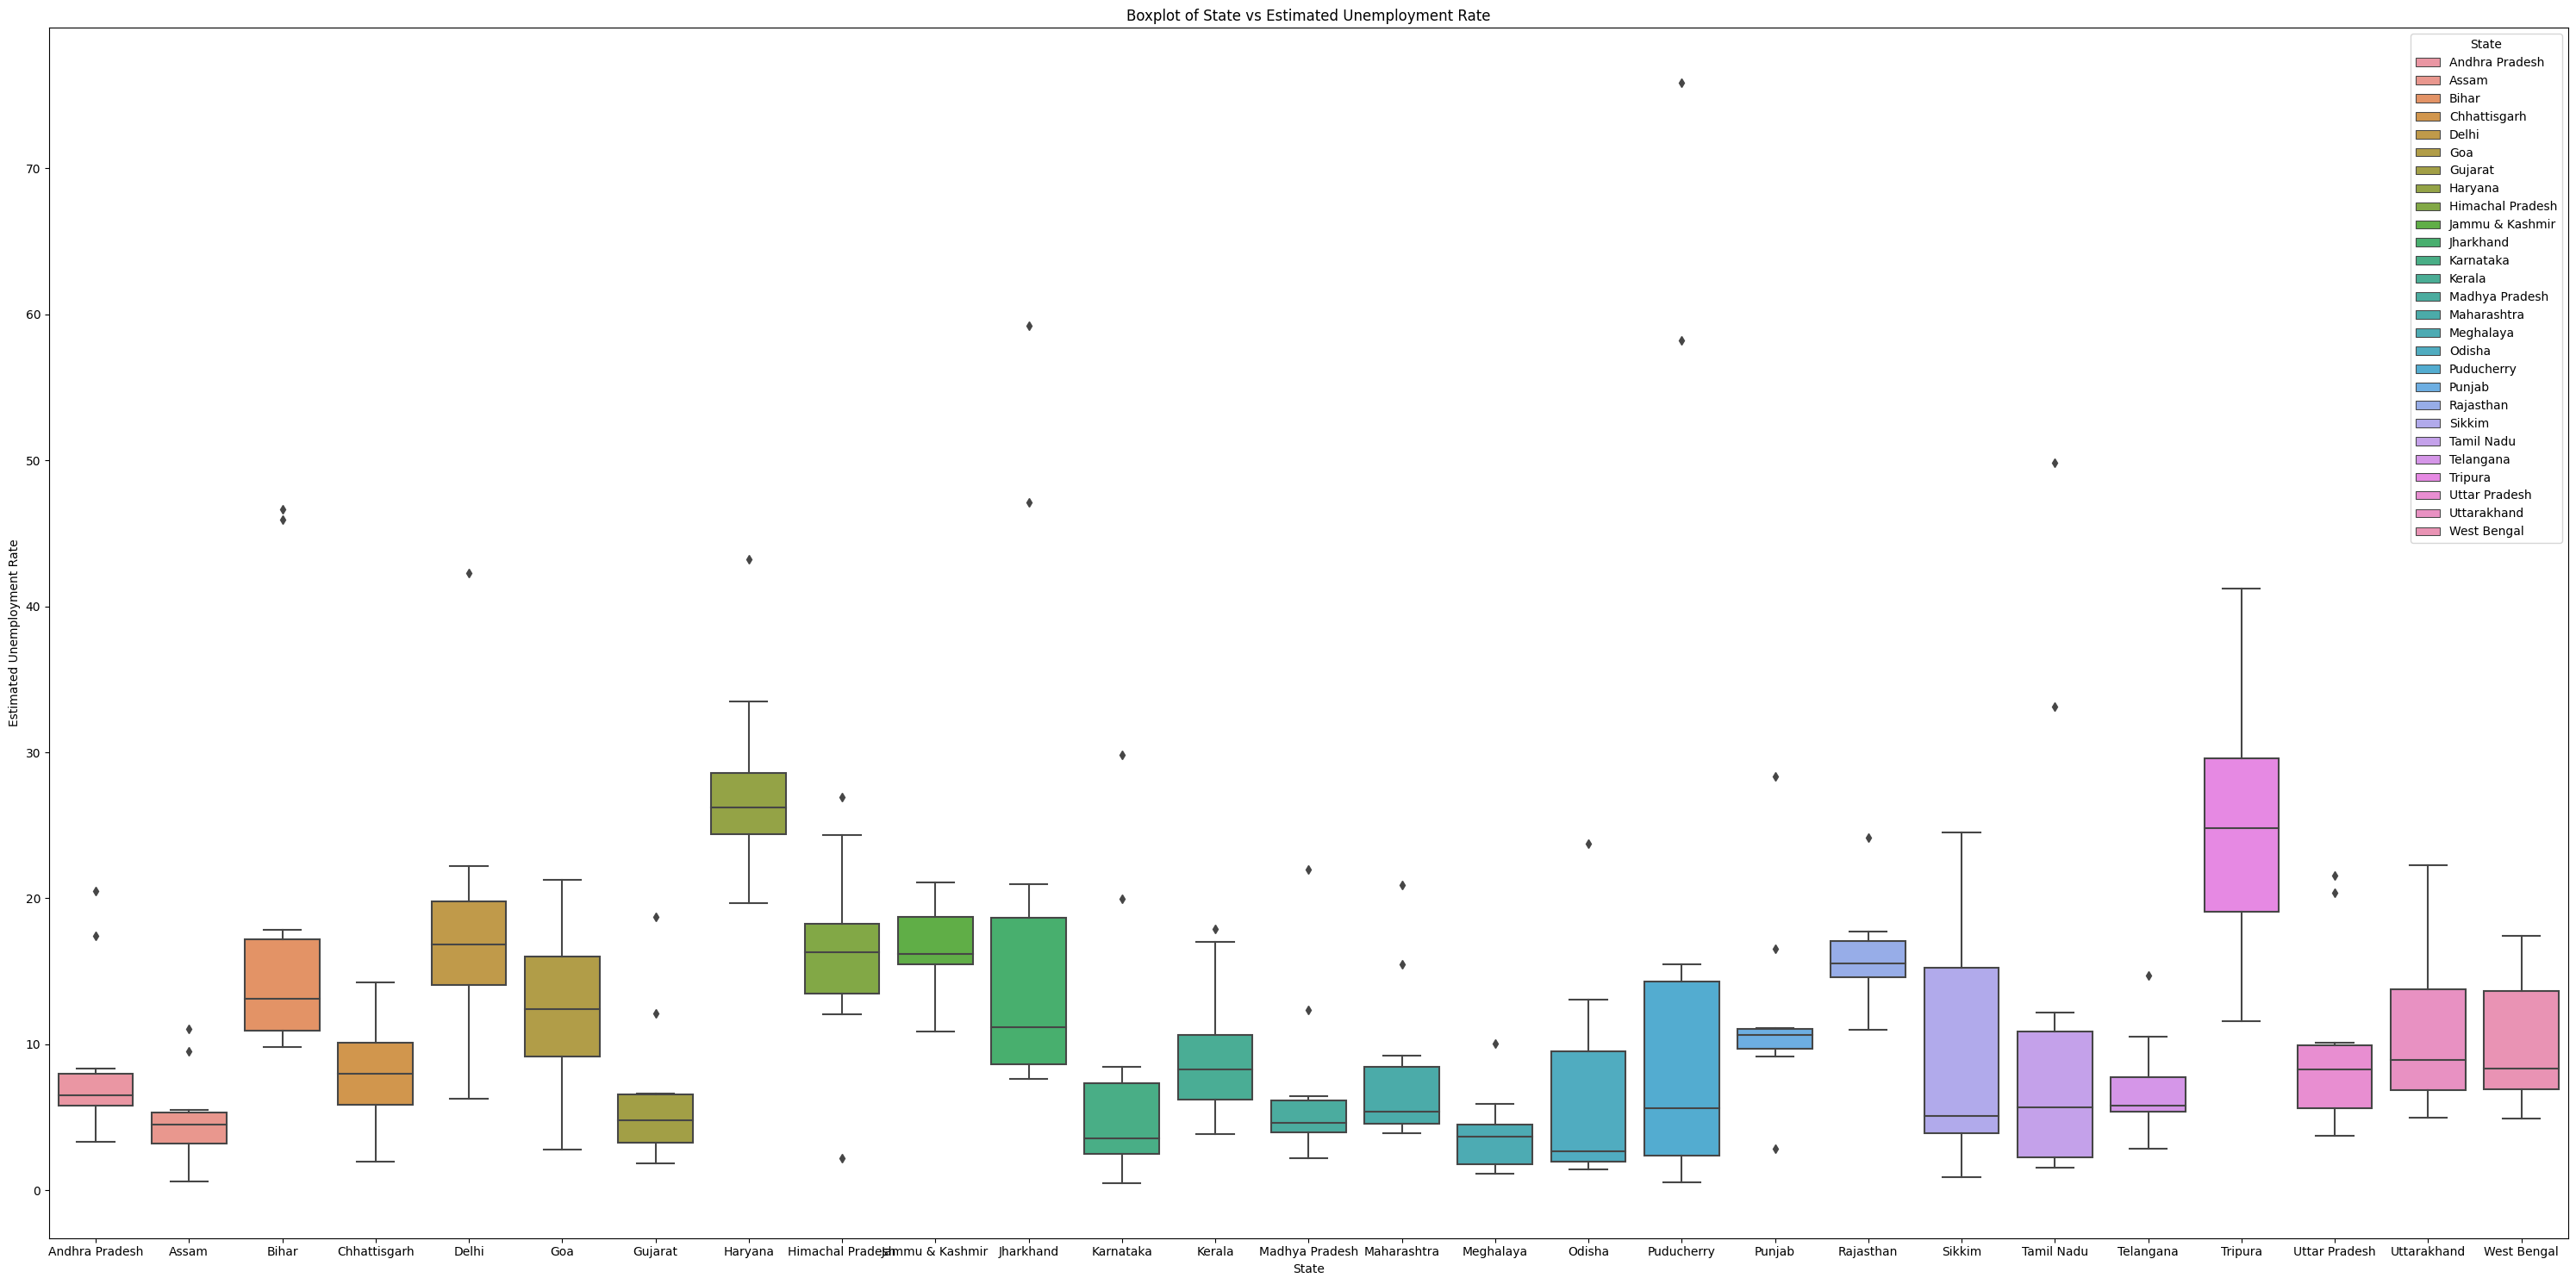

In [10]:
#plotting a box plot
plt.figure(figsize=(30,15))
plt.title('Boxplot of State vs Estimated Unemployment Rate')
sns.boxplot(data=df,x='State', y='Estimated Unemployment Rate',hue='State',dodge=False)
plt.tight_layout()


In [11]:
df1 = df[['Estimated Unemployment Rate', 'State']]
df_unemp = df1.groupby('State').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

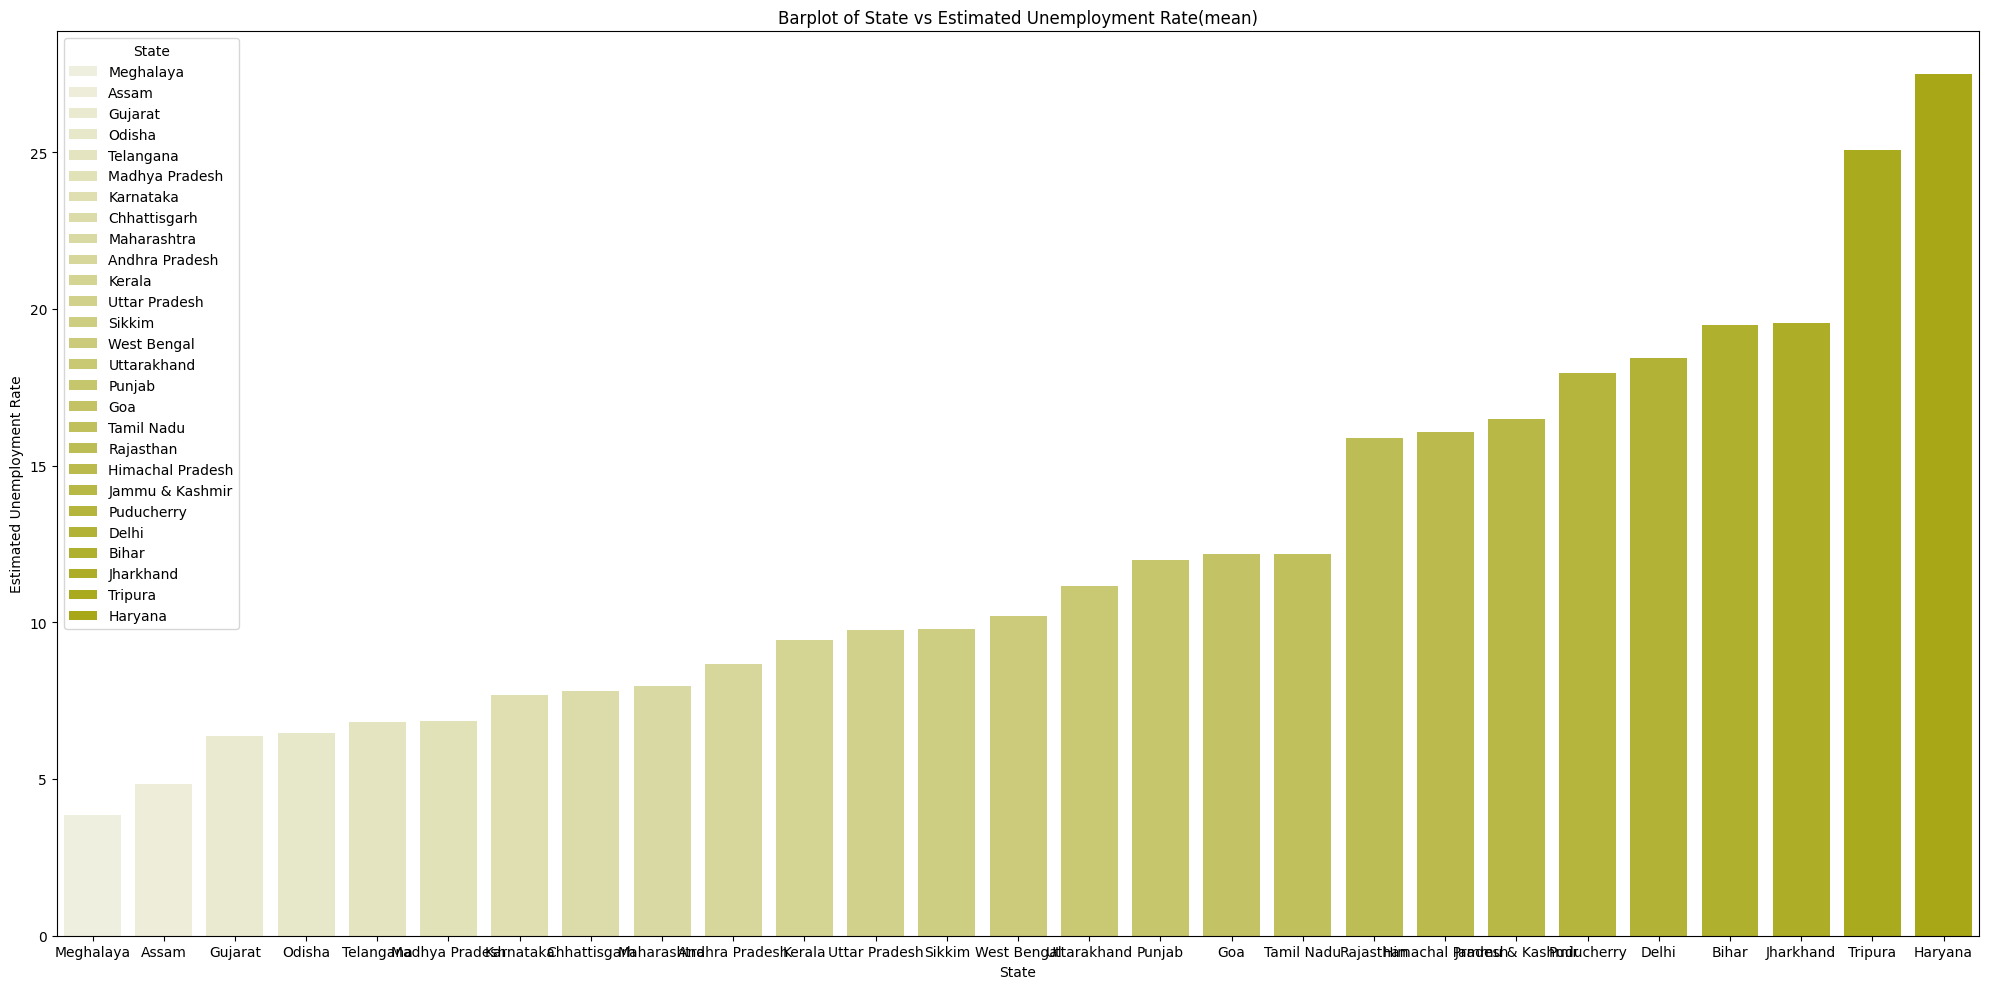

In [12]:
#barplot of State vs Estimated Unemployment Rate
plt.figure(figsize=(20,10))
plt.title('Barplot of State vs Estimated Unemployment Rate(mean)')
sns.barplot(data=df_unemp,x='State',y='Estimated Unemployment Rate',hue='State',color='y',dodge=False)
plt.tight_layout()

From the bar plot, the states of **Jharkhand** & **Harayana** have highest mean unemployment rate.

In [13]:
df2=df[['Estimated Unemployment Rate','Region']]
df_unemp = df2.groupby('Region').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

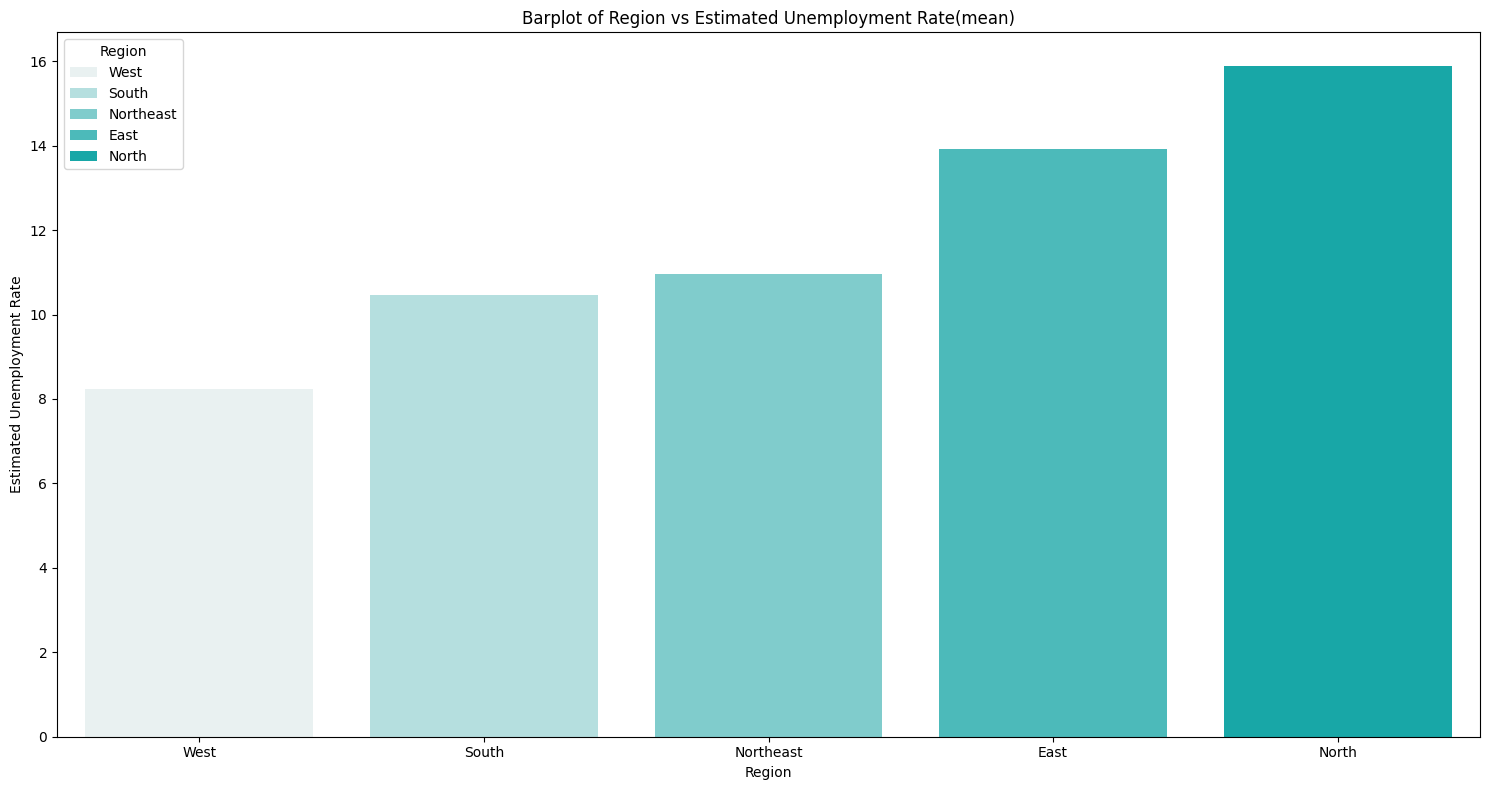

In [14]:
plt.figure(figsize=(15,8))
plt.title('Barplot of Region vs Estimated Unemployment Rate(mean)')
sns.barplot(data=df_unemp,x='Region',y='Estimated Unemployment Rate',hue='Region',color='c',dodge=False)
plt.tight_layout()

The region of **north** has the highest unemplyment rate while the **west** has lowest in India

Now we'll see monthwise

In [15]:
df3=df[['Estimated Unemployment Rate','Month_name']]
df_unemp = df3.groupby('Month_name').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

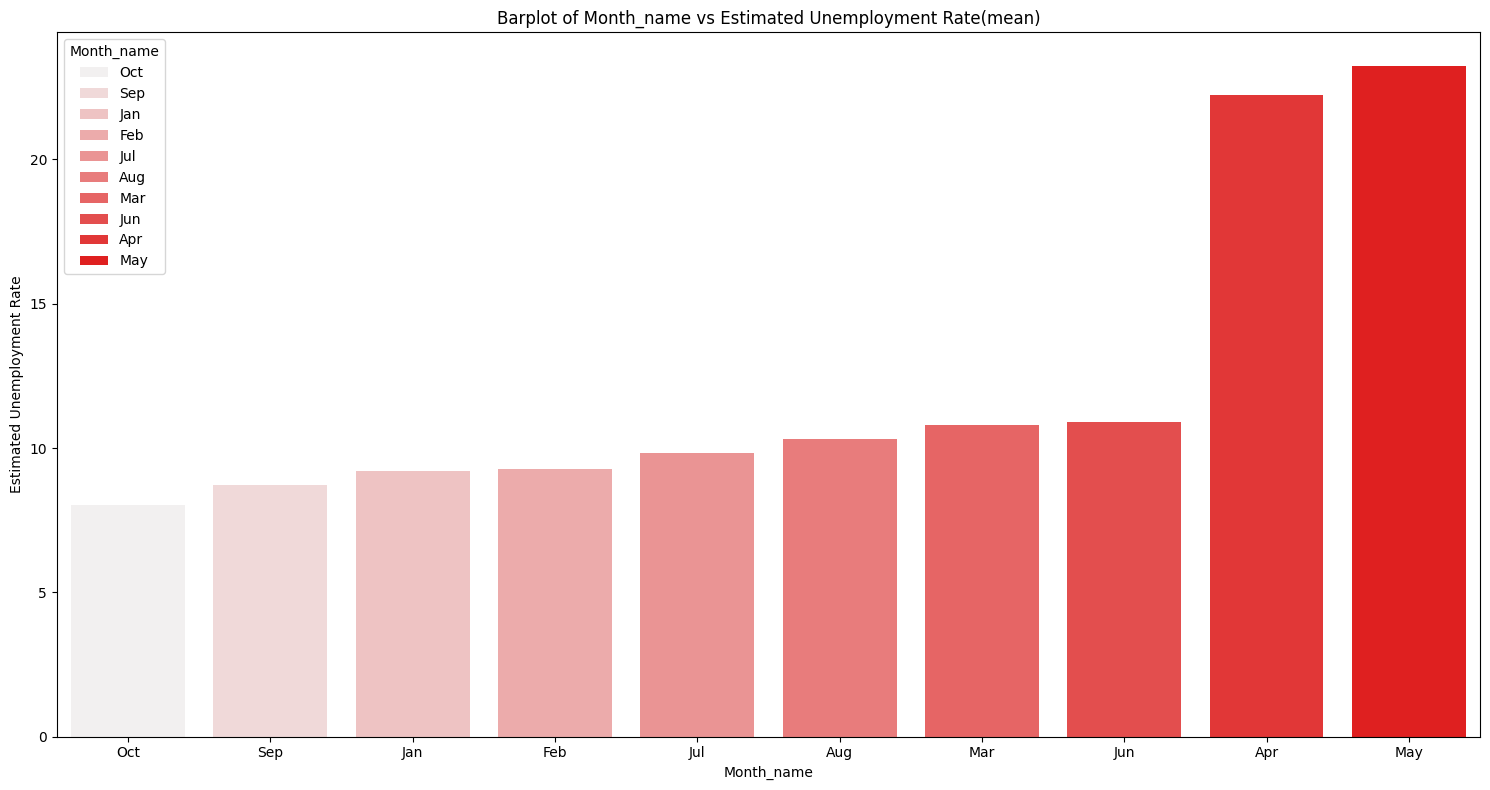

In [16]:
plt.figure(figsize=(15,8))
plt.title('Barplot of Month_name vs Estimated Unemployment Rate(mean)')
sns.barplot(data=df_unemp,x='Month_name',y='Estimated Unemployment Rate',hue='Month_name',color='r',dodge=False)
plt.tight_layout()

Months of **May** & **Apr** have significantly high mean unemployment rate during the period

<Axes: >

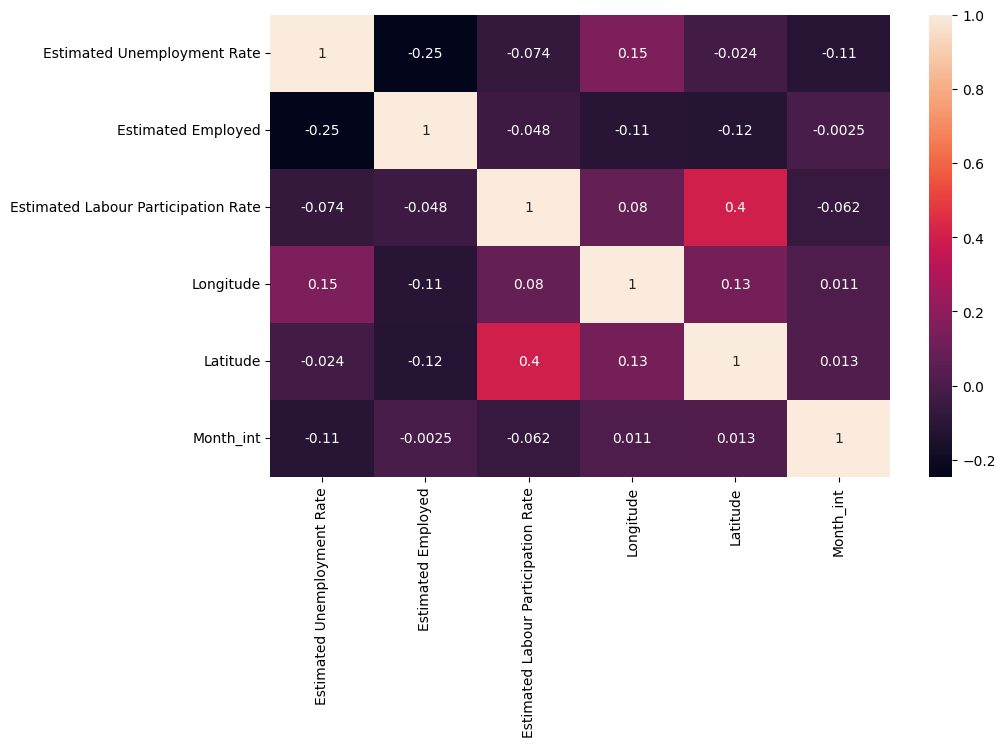

In [17]:
# correlation heatmap
hmp = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Longitude', 'Latitude', 'Month_int']]
hmp = hmp.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(hmp, annot=True)


We'll now visualize an animated bar plot of unemployment rate across region from Jan-2020 to Oct-2020 to see what impact lockdown had.

In [18]:
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='State', title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

We can see, that before lockdown(24th march 2020) the region order was ***North-Northeast-East-South-West*** but after lockdown in the month of April the order changed to ***South-East-North-West-Northeast*** and in the month of May the order was ***North-South-East-West-Northeast***

A map of India to help uderstand better

In [19]:
# map of India with unemployment regions marked

fig = px.scatter_geo(df, 'Longitude', 'Latitude', color='Region', hover_name='State', size='Estimated Unemployment Rate', animation_frame='Month_name', scope='asia', template='plotly', title='Impact of lockdown on employment across regions')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100], oceancolor="#6dd5ed", showocean=True)
fig.show()

The region of **South** and **East** were the most affected due to lockdown visible during the months of April & May

Calculating the rate before and after lockdown

In [20]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <= 7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <= 4)]
g_lock = lock.groupby('State')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('State')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['State','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head()

,State,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


Calculating the percentage chage before and after lockdown

In [21]:
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')

Text(0.5, 1.0, 'Percentage change in Unemployment in each state after lockdown')

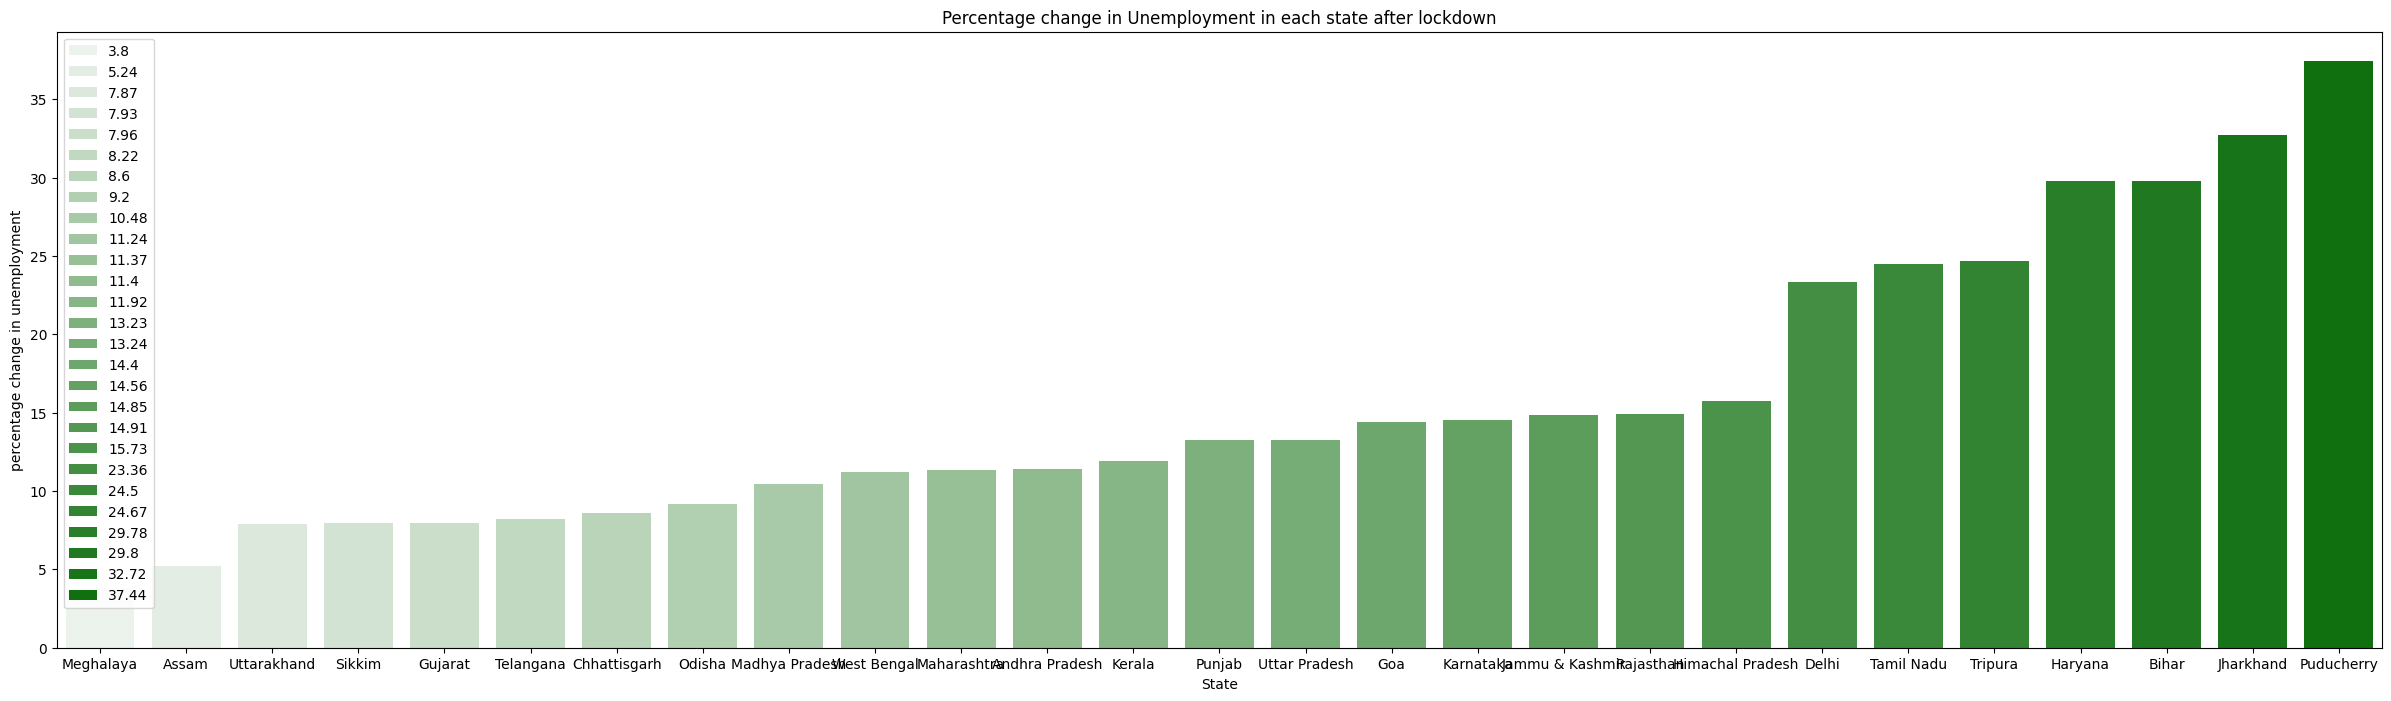

In [22]:
plt.figure(figsize=(30,8))
sns.barplot(data=plot_per, x='State',y='percentage change in unemployment',hue='percentage change in unemployment',color='g',dodge=False)
plt.legend(loc='upper left')
plt.title('Percentage change in Unemployment in each state after lockdown')

**Most impacted State/Union Territory due to lockdown was**
* Puducherry
* Jharkhand
* Bihar
* Haryana